In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time

In [16]:
import sys
sys.path.append('../../../nadavp/new_trap/Tools/')
import BeadDataFile
from discharge_tools import *

In [17]:
%matplotlib widget

In [18]:
Year = "2021"
Month = "05"
Day = "03"
BeadNumber = 1
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day

In [21]:
Compare_File_1 = 20
Compare_File_2 = 18


fname_1 = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" %Compare_File_1
fname_2 = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" %Compare_File_2

#fname_1 = folder+"/Bead"+str(BeadNumber)+"/Discharge/Discharge1/"+"/Discharge_290.h5"
#fname_2 = folder+"/Bead"+str(BeadNumber)+"/Discharge/Discharge2/"+"/Discharge_8.h5"

#fname_1 = folder+"/Bead"+str(BeadNumber)+"/Shaking/Shaking367/Shaking2_790.h5"
#fname_1 = folder+"/Bead"+str(BeadNumber)+"/Shaking/NoShaking1_0.h5"
#fname_2 = folder+"/Bead"+str(BeadNumber)+"/Shaking/NoShaking1_21.h5"


BDF = BeadDataFile.BeadDataFile(fname_1)
data1 = BDF.xyz2
#res=50000
fsamp = 5000
res = 5000
factor =40
data_det1=signal.detrend(data1)
xpsd1, freqs1 = matplotlib.mlab.psd(data_det1[0], Fs = fsamp, NFFT = res)
ypsd1, freqs1 = matplotlib.mlab.psd(data_det1[1], Fs = fsamp, NFFT = res)
zpsd1, freqs1 = matplotlib.mlab.psd(data_det1[2], Fs = fsamp, NFFT = res)
spsd1, freqs1_s = matplotlib.mlab.psd(BDF.spin_data[0], Fs = fsamp*factor, NFFT = res*factor)

BDF = BeadDataFile.BeadDataFile(fname_2)
data2 = BDF.xyz2
data_det2=signal.detrend(data2)
xpsd2, freqs2 = matplotlib.mlab.psd(data_det2[0], Fs = fsamp, NFFT = res)
ypsd2, freqs2 = matplotlib.mlab.psd(data_det2[1], Fs = fsamp, NFFT = res)
zpsd2, freqs2 = matplotlib.mlab.psd(data_det2[2], Fs = fsamp, NFFT = res)
spsd2, freqs2_s = matplotlib.mlab.psd(BDF.spin_data[0], Fs = fsamp*factor, NFFT = res*factor)


No height data
No electrodes data
No cantilever data
No laser power data
No height data
No electrodes data
No cantilever data
No laser power data


In [23]:
_,ax = plt.subplots()
label1='Data%d,spin' % Compare_File_1
label2='Data%d,spin' % Compare_File_2
ax.semilogy(freqs1_s, np.sqrt(spsd1), '.-',markersize=2,linewidth=1)
ax.semilogy(freqs2_s, np.sqrt(spsd2), '.-',markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
ax.set_title('spin')

#plt.xlim(0,250)
#plt.ylim(1e5,1e10)
#plt.xscale("log")
plt.grid(True)
#plt.ylim(5e-7,1e-3)
plt.xlim(0,25000)
#plt.savefig("Temporary_Plots/spin_com_wilson_spin_20200324.png",dpi=300,bbox_inches="tight")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


(0.0, 25000.0)

In [14]:
_,ax = plt.subplots()
label1="300mV"#'Data%d,x' % Compare_File_1
label2="1200mV" #'Data%d,x' % Compare_File_2
ax.loglog(freqs1, np.sqrt(xpsd1), '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, np.sqrt(xpsd2), '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
# plt.xlim(100,300)
# plt.ylim(1e5,1e10)
plt.xlim(1,2500)
plt.grid(True)

#ofname='../Documents/AkioK/Data%d.png' % Ndata
#ofname='../Documents/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata
#ofname='../Documents/AkioK/Shaking%d.png' % Ndata

#plt.savefig("Temporary_Plots/spin_com_wilson_x_20200324.png",dpi=300,bbox_inches="tight")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
_,ax = plt.subplots()

ax.loglog(freqs1, np.sqrt(ypsd1), '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, np.sqrt(ypsd2), '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
# plt.xlim(100,300)
# plt.ylim(1e5,1e10)
plt.xlim(1,2500)
plt.grid(True)

#ofname='../Documents/AkioK/Data%d.png' % Ndata
#ofname='../Documents/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata
#ofname='../Documents/AkioK/Shaking%d.png' % Ndata

#plt.savefig("Temporary_Plots/spin_com_wilson_y_20200324.png",dpi=300,bbox_inches="tight")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [33]:
_,ax = plt.subplots()

ax.loglog(freqs1, np.sqrt(zpsd1), '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, np.sqrt(zpsd2), '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
# plt.xlim(100,300)
# plt.ylim(1e5,1e10)
plt.xlim(1,2500)
plt.grid(True)

#ofname='../Documents/AkioK/Data%d.png' % Ndata
#ofname='../Documents/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata
#ofname='../Documents/AkioK/Shaking%d.png' % Ndata

#plt.savefig("Temporary_Plots/spin_com_wilson_z_20200324.png",dpi=300,bbox_inches="tight")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<IPython.core.display.Javascript object>


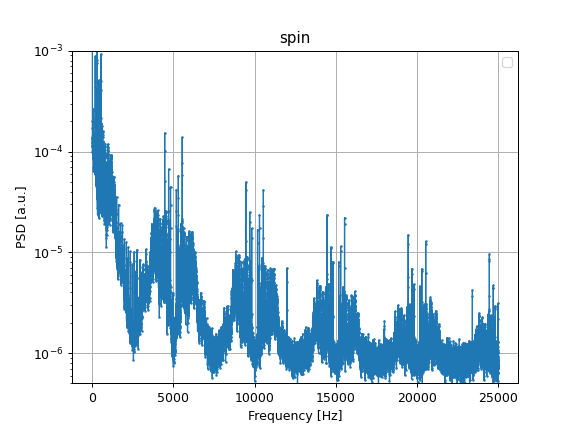

No handles with labels found to put in legend.


(5e-07, 0.001)

In [114]:
_,ax = plt.subplots()
#label1='Data%d,z' % Compare_File_1
ax.semilogy(freqs1_s, np.sqrt(spsd1), '.-',markersize=2,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
ax.set_title('spin')

#plt.xlim(0,250)
#plt.ylim(1e5,1e10)
# plt.xscale("log")
plt.grid(True)
plt.ylim(5e-7,1e-3)
#plt.xlim(0,10000)
#plt.savefig("Temporary_Plots/spin_com_wilson_spin_20200324.png",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


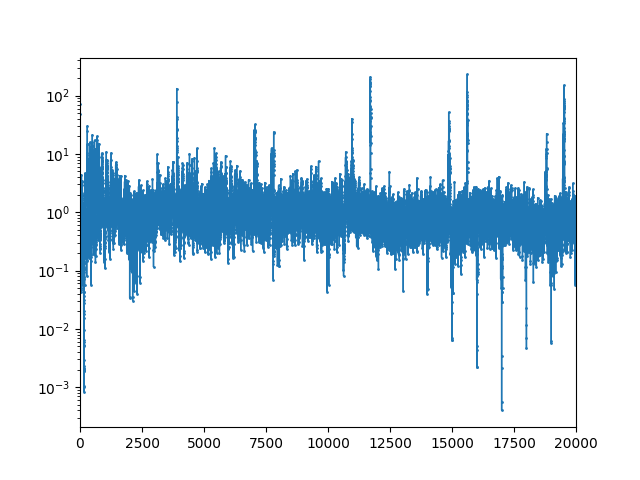

(0.0, 20000.0)

In [729]:
_,ax = plt.subplots()
ax.semilogy(freqs1_s, spsd1/spsd2, '.-', label=label1,markersize=2,linewidth=1)
plt.xlim(0,20000)


<IPython.core.display.Javascript object>


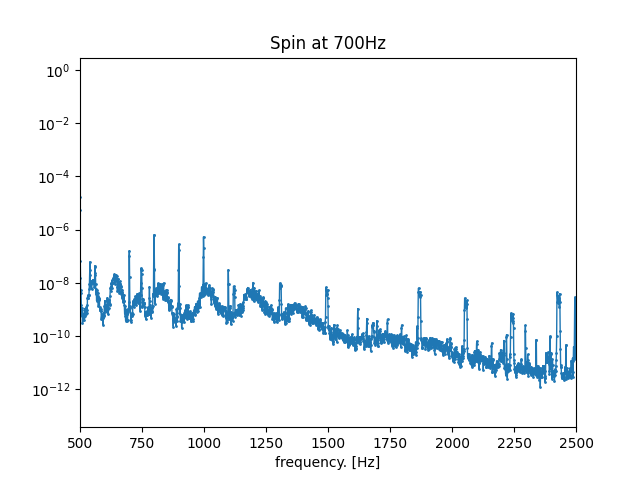

[(500.0, 2500.0),
 Text(0.5, 0, 'frequency. [Hz]'),
 Text(0.5, 1.0, 'Spin at 700Hz')]

In [172]:
_,ax = plt.subplots()
ax.semilogy(freqs1_s, spsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.set(xlim=(500,2500), xlabel='frequency. [Hz]', title='Spin at 700Hz')